In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from UN_Comtrade import download_trade_data
from UN_Comtrade import search_product_code, product_codes_with_parent

In [4]:
import os
os.chdir('fun')

In [5]:
search_product_code('camel', case=False)

{'010613': 'Live animals // Other live animals. // - Mammals : // -- Camels and other camelids (Camelidae)',
 '020860': 'Meat and edible meat offal // Other meat and edible meat offal, fresh, chilled or frozen. // -Of camels and other camelids (Camelidae)',
 '400610': 'Camel-back strips for retreading rubber tyres'}

In [6]:
product_codes_with_parent('0106')

{'010600': 'Animals, live, except farm animals',
 '010611': 'Live primates',
 '010612': 'Live whales/dolphins & porpoises (order Cetacea)/manatees & dugongs (order  ...',
 '010613': 'Live animals // Other live animals. // - Mammals : // -- Camels and other camelids (Camelidae)',
 '010614': 'Live animals // Other live animals. // - Mammals : // -- Rabbits and hares',
 '010619': 'Live mammals, n.e.s.',
 '010620': 'Live reptiles, incl. snakes & turtles',
 '010631': 'Live birds of prey',
 '010632': 'Live birds (order Psittaciformes), incl. parrots/parakeets/macaws/cockatoos ...',
 '010633': 'Live animals // Other live animals. // - Birds : // -- Ostriches; emus (Dromaius novaehollandiae)',
 '010639': 'Live birds (excl. of 0106.31 & 0106.32)',
 '010641': 'Live animals // Other live animals. // - Insects : // -- Bees',
 '010649': 'Live animals // Other live animals. // - Insects : // -- Other',
 '010690': 'Live animals, n.e.s.'}

In [7]:
download_trade_data('Germany_2010-2015_reptiles_imports.csv', period='201001-201512', frequency='M', reporter='Germany', 
                    partner='all', product='010620', tradeflow='imports')

https://comtrade.un.org/api/get?cc=010620&freq=M&fmt=json&head=M&ps=201001,201002,201003,201004,201005&type=C&max=50000&r=276&px=HS&rg=1&p=all
https://comtrade.un.org/api/get?cc=010620&freq=M&fmt=json&head=M&ps=201006,201007,201008,201009,201010&type=C&max=50000&r=276&px=HS&rg=1&p=all
https://comtrade.un.org/api/get?cc=010620&freq=M&fmt=json&head=M&ps=201011,201012,201101,201102,201103&type=C&max=50000&r=276&px=HS&rg=1&p=all
https://comtrade.un.org/api/get?cc=010620&freq=M&fmt=json&head=M&ps=201104,201105,201106,201107,201108&type=C&max=50000&r=276&px=HS&rg=1&p=all
https://comtrade.un.org/api/get?cc=010620&freq=M&fmt=json&head=M&ps=201109,201110,201111,201112,201201&type=C&max=50000&r=276&px=HS&rg=1&p=all
https://comtrade.un.org/api/get?cc=010620&freq=M&fmt=json&head=M&ps=201202,201203,201204,201205,201206&type=C&max=50000&r=276&px=HS&rg=1&p=all
https://comtrade.un.org/api/get?cc=010620&freq=M&fmt=json&head=M&ps=201207,201208,201209,201210,201211&type=C&max=50000&r=276&px=HS&rg=1&p=all

In [8]:
df = pd.read_csv('Germany_2010-2015_reptiles_imports.csv', encoding='latin-1', index_col=0)

In [9]:
df.columns

Index(['AltQuantity', 'CIFValue', 'FOBValue', 'GrossWeight', 'IsLeaf',
       'NetWeight', 'TradeQuantity', 'TradeValue', 'aggrLevel', 'cmdCode',
       'cmdDescE', 'cstCode', 'cstDesc', 'estCode', 'motCode', 'motDesc',
       'period', 'periodDesc', 'pfCode', 'pt3ISO', 'pt3ISO2', 'ptCode',
       'ptCode2', 'ptTitle', 'ptTitle2', 'qtAltCode', 'qtAltDesc', 'qtCode',
       'qtDesc', 'rgCode', 'rgDesc', 'rt3ISO', 'rtCode', 'rtTitle', 'yr'],
      dtype='object')

In [10]:
df1 = df[df.ptTitle != 'World']
df1 = df1[['ptTitle', 'TradeValue', 'period']]

In [11]:
df1.period = pd.to_datetime(df1.period, format='%Y%m')

In [12]:
df_top = df1.groupby('ptTitle').TradeValue.apply(np.sum).sort_values(ascending=False).head(10)
df_top

ptTitle
United States of America    5458514
Uzbekistan                   948246
Indonesia                    586291
United Rep. of Tanzania      562535
China                        452922
South Africa                 410366
Madagascar                   299699
Viet Nam                     277699
Ghana                        262533
Turkey                       239332
Name: TradeValue, dtype: int64

United States of America


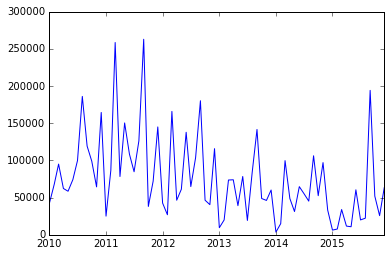

Uzbekistan


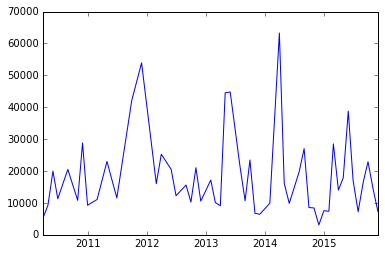

Indonesia


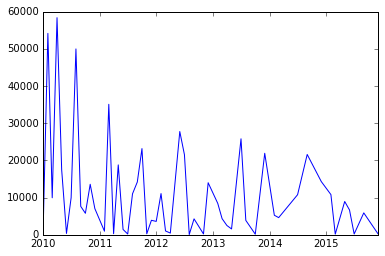

United Rep. of Tanzania


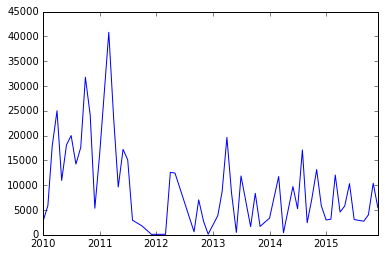

China


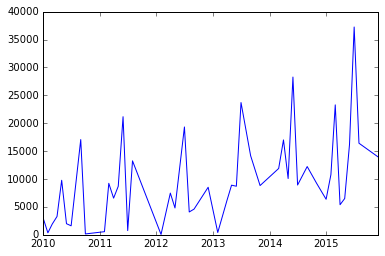

In [40]:
for country in df_top.index[:5]:
    print(country)
    df_c = df1[df1.ptTitle == country]
    df_c.set_index('period', inplace=True)
    plt.plot(df_c.index, df_c.TradeValue)
    plt.show()